In [1]:
import gensim


In [3]:
import numpy as np
import pandas as pd

In [5]:
import os

In [12]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess  # can do all teh preprocessing by self

In [18]:
# the got dataset contain 5 txt file which are 5 books 
# we opening each book make it corpus then tokenize it 
# done preprocessing on each word then added it to story

In [16]:
story=[]
for filename in os.listdir('GOT Dataset'):
    f=open(os.path.join('GOT Dataset',filename))
    corpus=f.read()
    raw_sent=sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [89]:
len(story)  # total number of sentences

145020

In [20]:
story   # it is a 2d list ie list of sentence 

[['game',
  'of',
  'thrones',
  'book',
  'one',
  'of',
  'song',
  'of',
  'ice',
  'and',
  'fire',
  'by',
  'george',
  'martin',
  'prologue',
  'we',
  'should',
  'start',
  'back',
  'gared',
  'urged',
  'as',
  'the',
  'woods',
  'began',
  'to',
  'grow',
  'dark',
  'around',
  'them'],
 ['the', 'wildlings', 'are', 'dead'],
 ['do', 'the', 'dead', 'frighten', 'you'],
 ['ser',
  'waymar',
  'royce',
  'asked',
  'with',
  'just',
  'the',
  'hint',
  'of',
  'smile'],
 ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait'],
 ['he',
  'was',
  'an',
  'old',
  'man',
  'past',
  'fifty',
  'and',
  'he',
  'had',
  'seen',
  'the',
  'lordlings',
  'come',
  'and',
  'go'],
 ['dead', 'is', 'dead', 'he', 'said'],
 ['we', 'have', 'no', 'business', 'with', 'the', 'dead'],
 ['are', 'they', 'dead'],
 ['royce', 'asked', 'softly'],
 ['what', 'proof', 'have', 'we'],
 ['will', 'saw', 'them', 'gared', 'said'],
 ['if',
  'he',
  'says',
  'they',
  'are',
  'dead',
  'that',
  'proof',


In [30]:
len(story)

145020

In [ ]:
# window=10 ie both side 10 context word for target
# min count=2 ie we take those sentence which have more than 2 words

In [36]:
model=gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [91]:
model.build_vocab(story)   # to get all unique word fron corpus

In [ ]:
# to train model we need to give corpus, total number of word in corpus, epoch 5 (5 times model data pr iterate krega)

In [40]:
model.train(story,total_examples=model.corpus_count,epochs=model.epochs)

(6568603, 8628190)

In [ ]:
# wv = word to vector

In [45]:
model.wv.most_similar('daenerys')   # most similar word to daenerys in corpus

[('stormborn', 0.7851350903511047),
 ('targaryen', 0.7515749335289001),
 ('queen', 0.722491443157196),
 ('princess', 0.7223081588745117),
 ('myrcella', 0.6993951201438904),
 ('unburnt', 0.6738630533218384),
 ('margaery', 0.6670573949813843),
 ('elia', 0.6624459028244019),
 ('aegon', 0.6470142602920532),
 ('marriage', 0.6424728631973267)]

In [47]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [53]:
model.wv['king']   # the dimension of each word is 100 and vector by which it represent is

array([ 1.6809456 ,  0.9192882 ,  2.3009467 ,  0.01226197, -0.49501425,
        0.00765083,  1.2396241 ,  1.0042119 , -2.8182075 ,  0.4737908 ,
       -1.6081905 , -0.2949405 , -0.01322974,  0.6291939 , -2.758015  ,
       -2.3323948 ,  1.1851122 ,  1.5503185 ,  1.4457376 ,  0.9865431 ,
        2.3591824 , -1.1509787 ,  1.5064919 , -4.1310077 , -1.9564921 ,
        0.24997833, -1.4464926 , -1.1207098 , -0.09196685,  0.7994    ,
       -2.2338326 ,  0.89836425,  1.5095222 , -1.8452679 ,  2.6686726 ,
       -4.362923  , -4.1286407 , -0.6982904 ,  0.50630915, -2.7414567 ,
       -0.71195465,  2.928225  ,  1.6354511 , -0.15030174, -1.277547  ,
       -0.7191077 ,  1.6563762 , -1.5263944 ,  1.5591558 , -1.4383329 ,
       -3.1909006 , -0.93840027, -2.362863  , -2.8103967 ,  2.593643  ,
       -1.8507717 , -0.4010781 ,  1.4088526 , -0.8949678 ,  0.6632257 ,
        0.73713213,  1.9559954 , -1.7164438 , -1.4783453 ,  1.3214614 ,
        2.3281744 , -0.3830871 , -0.14320432, -0.77178854, -1.92

In [55]:
model.wv['king'].shape

(100,)

In [59]:
model.wv.similarity('arya','sansa')

0.8604778

In [62]:
model.wv.get_normed_vectors()

array([[-3.70210446e-02, -1.82809249e-01,  8.37800130e-02, ...,
        -1.55233070e-01, -3.55406962e-02, -3.10614873e-02],
       [-1.25959560e-01, -2.41380036e-01,  4.73955552e-05, ...,
        -4.53090630e-02,  3.68380845e-02,  9.85429436e-02],
       [ 1.98328167e-01, -3.54618058e-02, -3.11083347e-02, ...,
        -6.57415763e-03,  9.65607092e-02,  1.61161944e-02],
       ...,
       [ 5.28931841e-02,  6.89297765e-02, -6.63801134e-02, ...,
         2.47478159e-03,  1.18876174e-01, -1.10980079e-01],
       [ 4.67262939e-02,  6.37690127e-02,  1.53785571e-01, ...,
         1.87303722e-02,  4.44415323e-02, -1.02175511e-01],
       [-6.74028173e-02,  6.62876517e-02,  1.16273545e-01, ...,
        -2.32645553e-02,  8.74445960e-02, -7.95163736e-02]], dtype=float32)

In [93]:
model.wv.get_normed_vectors().shape

(17453, 100)

In [95]:
# these 17453 are unique word in dataset
# model.wv.get_normed_vectors() give all the 17453 unique word in vector from where each vector 100 dimension

In [65]:
y=model.wv.index_to_key

In [99]:
# index_to_key is use to find word from the vector

In [97]:
y   # model.wv.get_normed_vectors() the first value we get from this is vector representation of word 'the'

['the',
 'and',
 'to',
 'of',
 'he',
 'his',
 'was',
 'you',
 'her',
 'in',
 'it',
 'had',
 'that',
 'she',
 'as',
 'with',
 'him',
 'not',
 'but',
 'for',
 'they',
 'is',
 'at',
 'on',
 'said',
 'my',
 'have',
 'be',
 'lord',
 'them',
 'no',
 'from',
 'would',
 'were',
 'me',
 'your',
 'one',
 'all',
 'when',
 'will',
 'ser',
 'if',
 'so',
 'their',
 'we',
 'could',
 'are',
 'man',
 'there',
 'this',
 'up',
 'been',
 'what',
 'did',
 'by',
 'king',
 'do',
 'men',
 'back',
 'out',
 'more',
 'or',
 'who',
 'down',
 'well',
 'than',
 'only',
 'like',
 'jon',
 'some',
 'father',
 'old',
 'hand',
 'even',
 'too',
 'tyrion',
 'before',
 'never',
 'an',
 'off',
 'see',
 'know',
 'into',
 'made',
 'now',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'then',
 'how',
 'long',
 'has',
 'can',
 'might',
 'us',
 'come',
 'where',
 'here',
 'through',
 'still',
 'face',
 'head',
 'red',
 'll',
 'way',
 'boy',
 'page',
 'must',
 'once',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 

In [72]:
# it is very difficult to plot a 100 dimension space
# so we reduce dimensity to 3 by pca and then try t0 pllot

In [74]:
from sklearn.decomposition import PCA

In [76]:
pca=PCA(n_components=3) # dimension 3

In [78]:
x=pca.fit_transform(model.wv.get_normed_vectors())

In [80]:
x.shape

(17453, 3)

In [85]:
import plotly.express as px

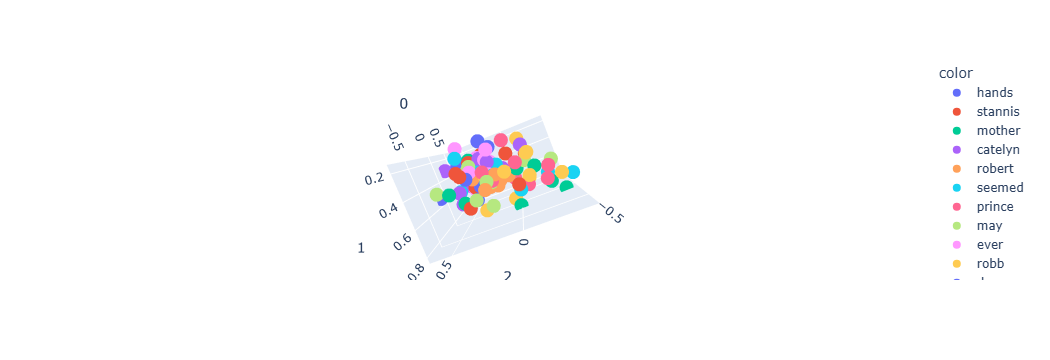

In [87]:
fig=px.scatter_3d(x[200:300],x=0,y=1,z=2,color=y[200:300])
fig.show()